In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Importing the dataset using pandas read_csv

lending_club = pd.read_csv("LendingClubStudy/loan.csv")

/var/folders/cz/3yq30z692_dfgfqhcy36qmjc0000gn/T/ipykernel_3184/611540732.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lending_club = pd.read_csv("LendingClubStudy/loan.csv")


In [20]:
# To get the higher-level overview of the data

lending_club.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [21]:
# Dimensions of the dataset
print("Shape of the dataframe: ",lending_club.shape)

# Information about the dataframe
print("Information of the dataframe: ", lending_club.info())

Shape of the dataframe:  (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
Information of the dataframe:  None


The dataset contains 111 columns and 39,717 rows of data.

In [22]:
# To get the columns of the dataset
lending_club.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [23]:
# The data types of the columns
lending_club.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [25]:
# To check the count of null values
lending_club .isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

It appears that most of the columns have null values and most important is that few columns dont have any values in it. We will remove all the columns that have no values or all null values.

In [26]:
lending_club.dropna(axis=1, how="all", inplace=True)
lending_club.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [27]:
lending_club.shape

(39717, 57)

After removing the columns that has all null values, we have reduced the dimensions of the dataframe to 57 columns from 111 columns.

There are certain columns which are customer behaviour variables in the dataset which are not useful for our analysis, hence removing those columns.

In [28]:
lending_club.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
lending_club.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [29]:
lending_club.shape

(39717, 21)

Post removing the columns, we have 21 columns for our analysis.

In [30]:
lending_club.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

The goal of the analysis is to check who are likely to default, so in this case, we won't be needing the loan status with the value as "Current" as these people are still paying the loan amount and cannot be marked as defaulters.

In [32]:
lending_club = lending_club[lending_club.loan_status != "Current"]
lending_club.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [15]:
# Checking for missing values

(lending_club.isna().sum()/len(lending_club.index))*100

# We have two columns with null values with very less percentage.

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [33]:
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

We can impute the mode of the column in order to handle missing values, but in this case, we will delete those rows

In [36]:
lending_club.dropna(axis=0,subset=['emp_length'], inplace=True)
lending_club.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

(lending_club.isna().sum()/len(lending_club.index))*100

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
dtype: float64

### Standardizing the values

Since all the columns have datatype of object and has continuous values, we will standardise certain columns for our analysis.

In [37]:
lending_club.revol_util = pd.to_numeric(lending_club.revol_util.apply(lambda x : x.split('%')[0]))

In [38]:
lending_club.int_rate = pd.to_numeric(lending_club.int_rate.apply(lambda x : x.split('%')[0]))

In [39]:
lending_club.emp_length = pd.to_numeric(lending_club.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

### Treating Outliers

/Users/yadhunandankka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

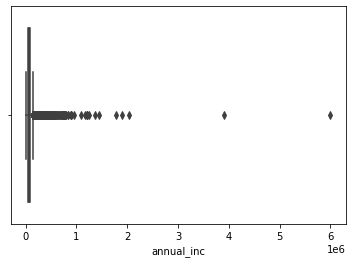

In [41]:
sns.boxplot(lending_club['annual_inc'])

There are presence of outliers in the annual income column, based on the percentile info, we will treat the outliers.

In [42]:
q_info = lending_club.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
q_info

0.50     60000.00
0.75     83000.00
0.90    116714.40
0.95    142000.00
0.97    166307.32
0.98    189996.00
0.99    235000.00
Name: annual_inc, dtype: float64

From 95th percentile, we will treat them as outliers.

In [43]:
annual_inc_95 = lending_club['annual_inc'].quantile(0.95)
lending_club = lending_club[lending_club.annual_inc <= annual_inc_95]

/Users/yadhunandankka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

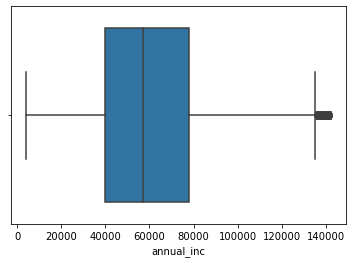

In [44]:
sns.boxplot(lending_club.annual_inc)

/Users/yadhunandankka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

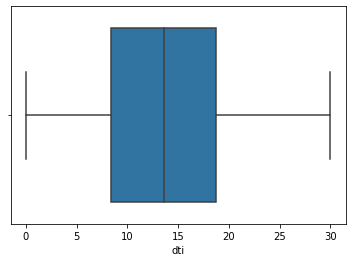

In [45]:
sns.boxplot(lending_club.dti)

/Users/yadhunandankka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

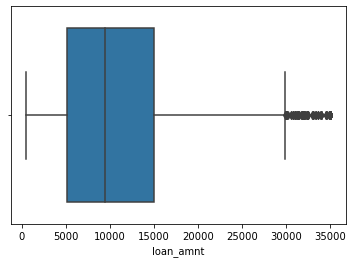

In [46]:
sns.boxplot(lending_club.loan_amnt)

## Visualizing Categorical Data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

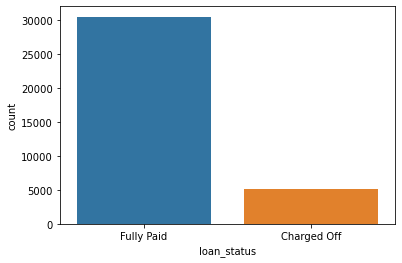

In [47]:
sns.countplot(x = 'loan_status', data = lending_club)

<AxesSubplot:xlabel='grade', ylabel='count'>

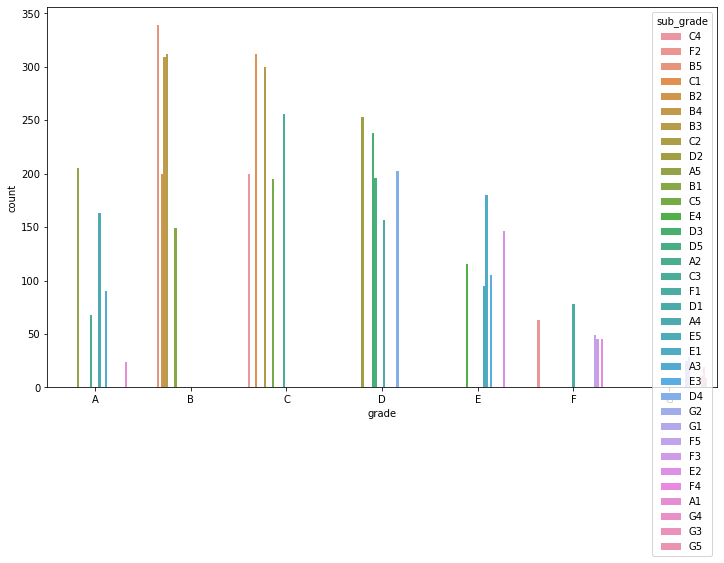

In [51]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = lending_club[lending_club.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

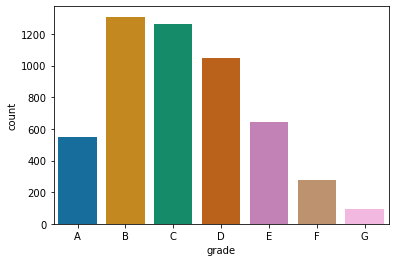

In [52]:
sns.countplot(x = 'grade', data = lending_club[lending_club.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Analysing house ownership

In [54]:
lending_club['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [55]:
#replacing 'NONE' with 'OTHERS'
lending_club['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

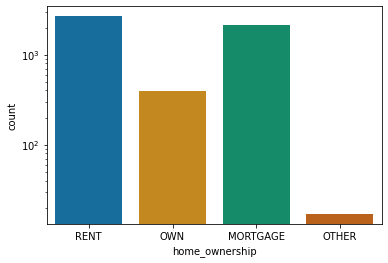

In [56]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=lending_club[lending_club['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

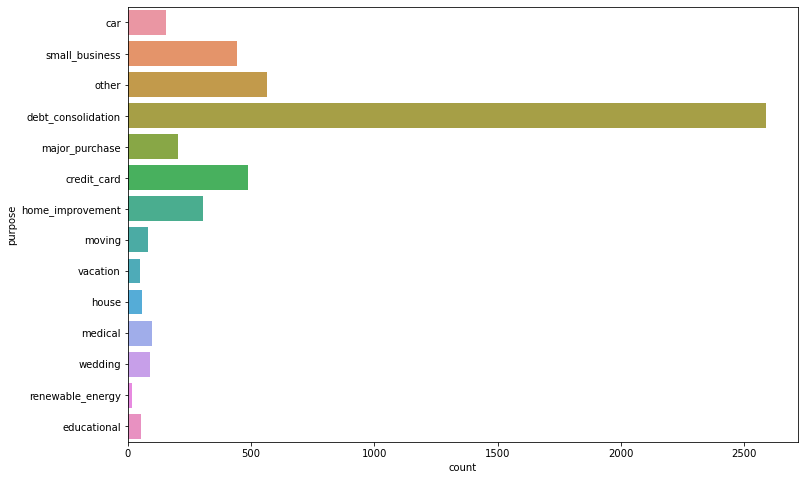

In [57]:
# Analysing the purpose of the loan

fig = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=lending_club[lending_club.loan_status == 'Charged Off'])

In [58]:
# Creation of bins for analysis
lending_club['int_rate_groups'] = pd.cut(lending_club['int_rate'], bins=5,precision =0,labels=['5%-10%','10%-15%','15%-17%','17%-20%','20%-25%'])
lending_club['open_acc_groups'] = pd.cut(lending_club['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
lending_club['revol_util_groups'] = pd.cut(lending_club['revol_util'], bins=5,precision =0,labels=['0-22','22-44','44-66','66-88','88-100'])
lending_club['total_acc_groups'] = pd.cut(lending_club['total_acc'], bins=5,precision =0,labels=['2-18','18-37','37-58','58-78','78-90'])
lending_club['annual_inc_groups'] = pd.cut(lending_club['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [59]:
lending_club.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,1,3,0,83.7,9,10%-15%,2-10,88-100,2-18,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,5,3,0,9.4,4,15%-17%,2-10,0-22,2-18,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,2,0,98.5,10,15%-17%,2-10,88-100,2-18,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,1,10,0,21.0,37,15%-17%,2-10,22-44,18-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-10%,2-10,22-44,2-18,31k-58k


<AxesSubplot:xlabel='emp_length', ylabel='count'>

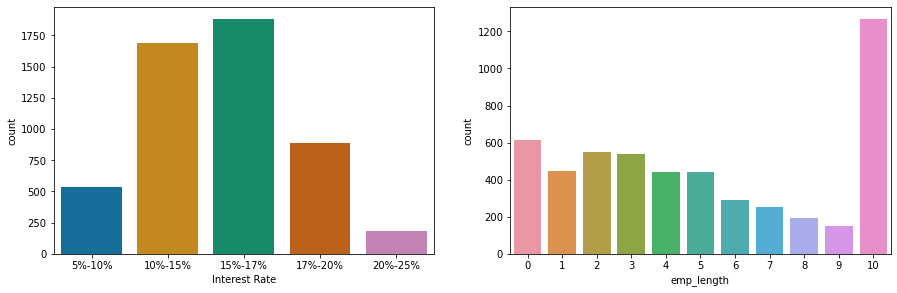

In [60]:
fig = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=lending_club[lending_club.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=lending_club[lending_club.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

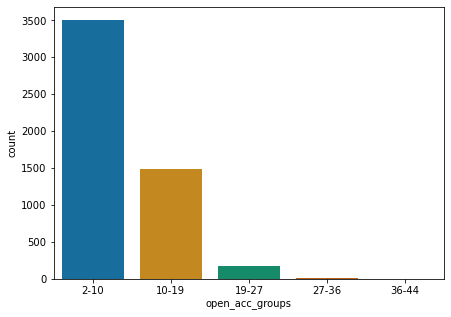

In [62]:
fig = plt.subplots(figsize = (7,5))
sns.countplot(x='open_acc_groups', data=lending_club[lending_club.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

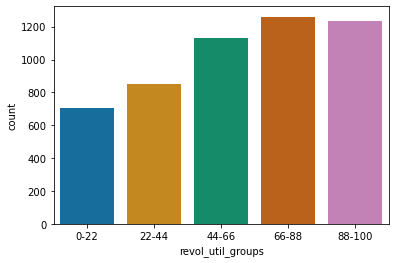

In [63]:
sns.countplot(x='revol_util_groups', data=lending_club[lending_club.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

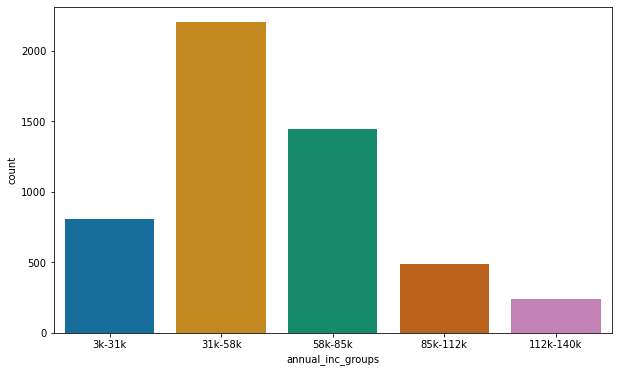

In [65]:
fig = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=lending_club[lending_club.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

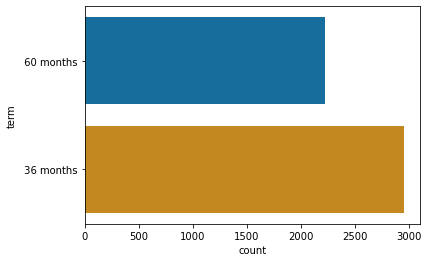

In [66]:
sns.countplot(y='term', data=lending_club[lending_club['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

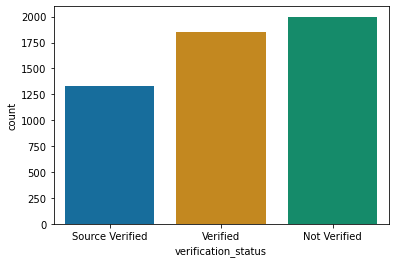

In [67]:
sns.countplot(x='verification_status', data=lending_club[lending_club['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

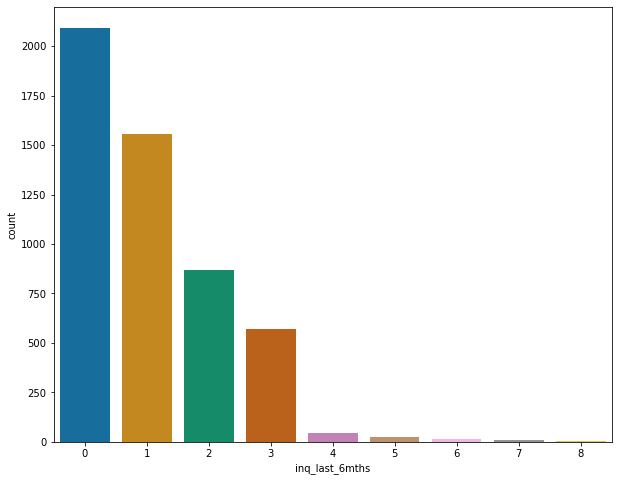

In [68]:
fig = plt.subplots(figsize = (10,8))
sns.countplot(x='inq_last_6mths', data=lending_club[lending_club['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='issue_month', ylabel='count'>

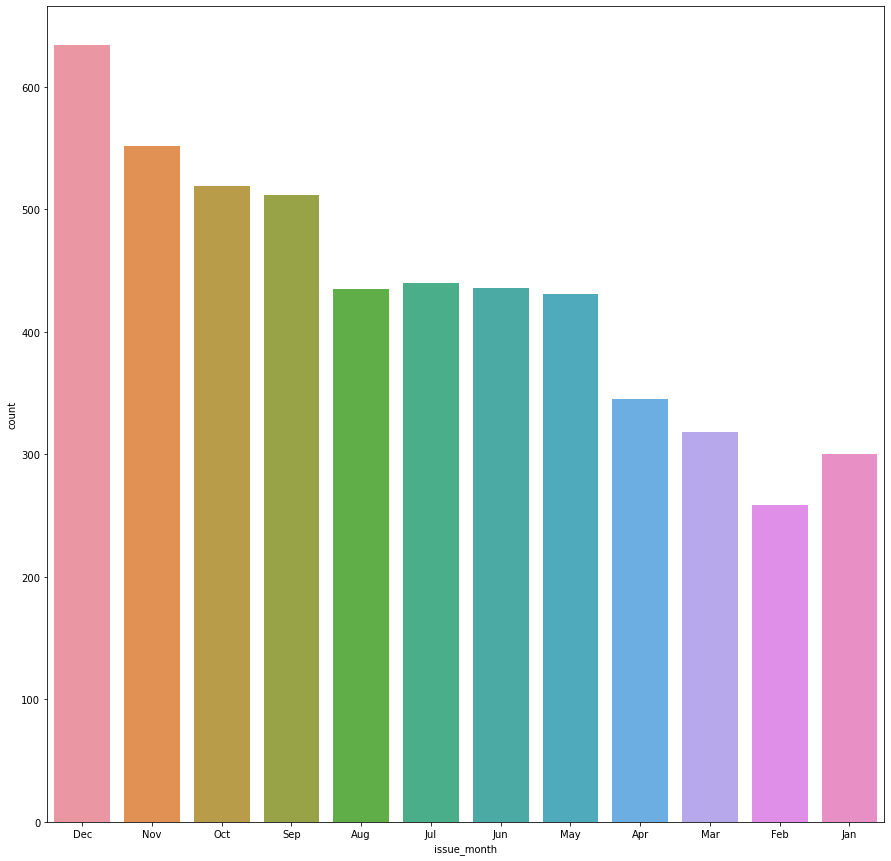

In [69]:
df_month_year = lending_club['issue_d'].str.partition("-", True)     
lending_club['issue_month']=df_month_year[0]

plt.figure(figsize=(15,15))
sns.countplot(x='issue_month', data=lending_club[lending_club['loan_status']=='Charged Off'])

Maximum number of defaults happened when the loan was issued in the month of December.

#### Analysing installment,dti and loan_amt 

In [70]:
lending_club['installment_groups'] = pd.cut(lending_club['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
lending_club['funded_amnt_inv_group'] = pd.cut(lending_club['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lending_club['loan_amnt_groups'] = pd.cut(lending_club['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lending_club['dti_groups'] = pd.cut(lending_club['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

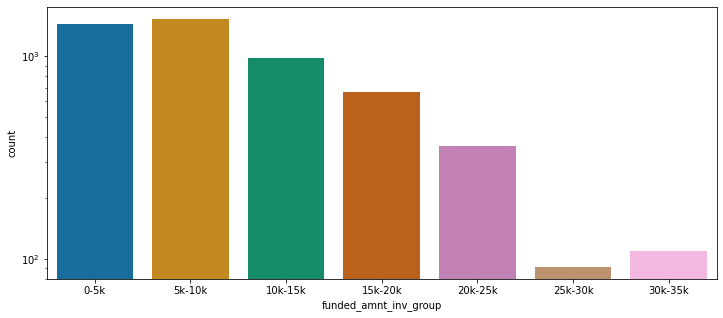

In [71]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=lending_club[lending_club['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

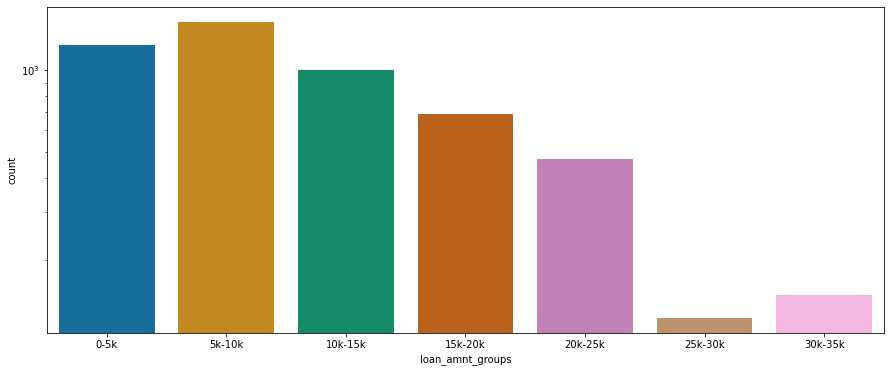

In [72]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=lending_club[lending_club['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

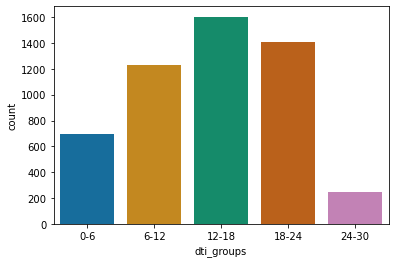

In [73]:
sns.countplot(x='dti_groups', data=lending_club[lending_club['loan_status']=='Charged Off'])

#### There is more chance of defaulting when 
- Applicants having house_ownership as 'RENT'.
- Applicants who use the loan to clear debts
- Applicants who receive interest rate of 15% - 17%
- Funded amount by investor is between the range of 5000-10000
- Applicants are likely to default if the loan amount is between 5K to 10K
- Dti is between 12 to 18
- When the applicants loan status is not verified.
- When the reason for loan is debt-clearance, the applicant is likely to default.
- The applicants are likely to default when the grade is B

There is one observation that applicants are more likely to defaulted in the later part of the year as per the month year analysis.

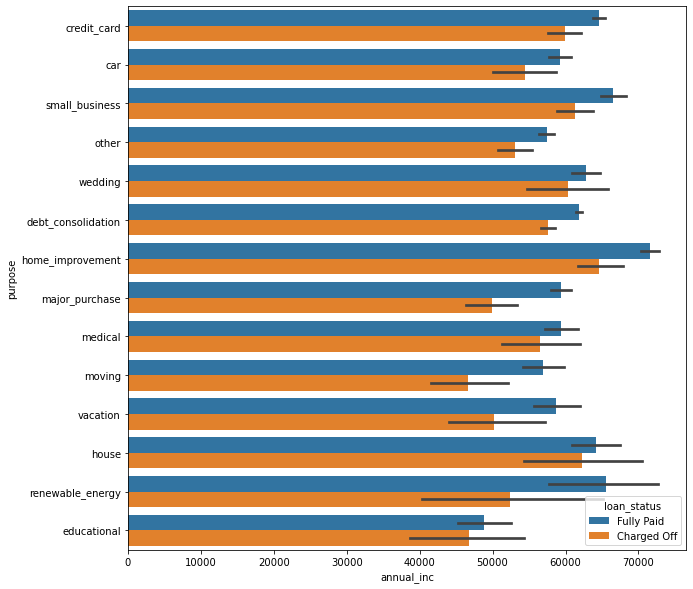

In [75]:
# Annual income vs Loan purpose

plt.figure(figsize=(10,10))
sns.barplot(data =lending_club,x='annual_inc', y='purpose', hue ='loan_status',palette="tab10")
plt.show()

Applicants are applying loan for home_improvement, small business and renewable_energy.

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

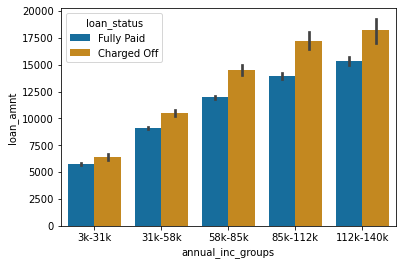

In [76]:
# Annual Income vs Loan Amount

sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = lending_club)

Across all the age groups, the loan amount is higher for the defaulters.

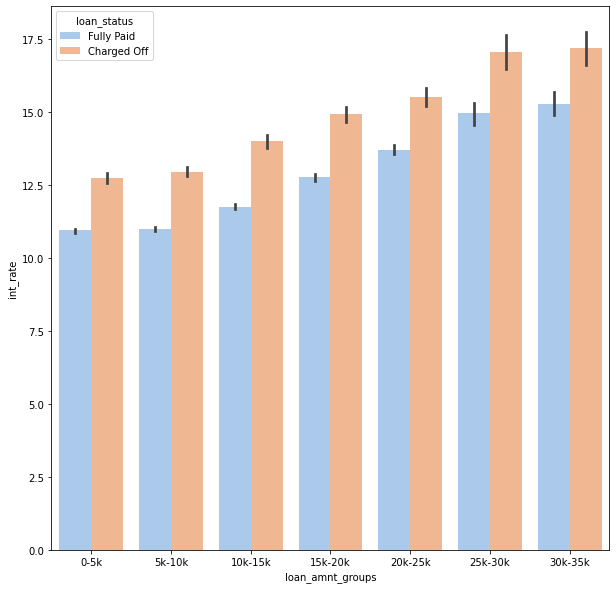

In [77]:
# Loan amount vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

In most cases, if the interest rate is higher and the loan amount is higher, there is a higher chance of defaulting.

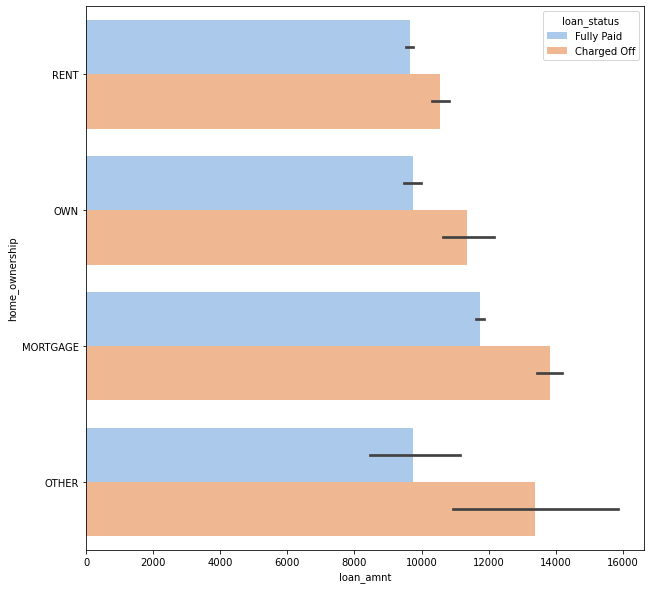

In [78]:
# Loan vs House Ownership

plt.figure(figsize=(10,10))
sns.barplot(data =lending_club,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

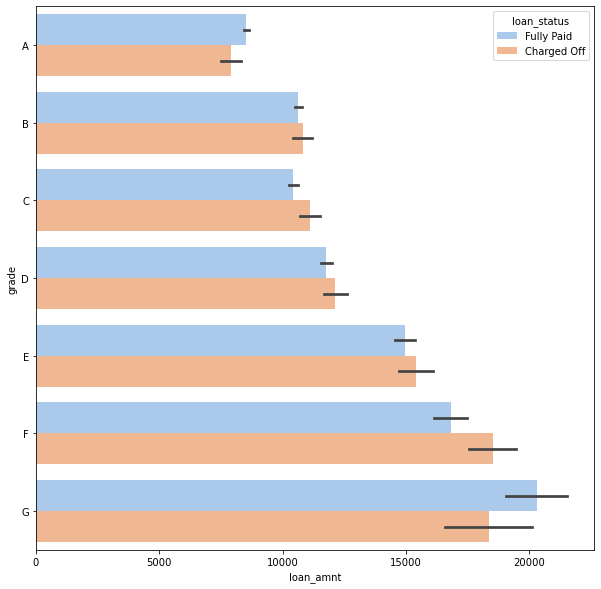

In [79]:
# Loan Amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

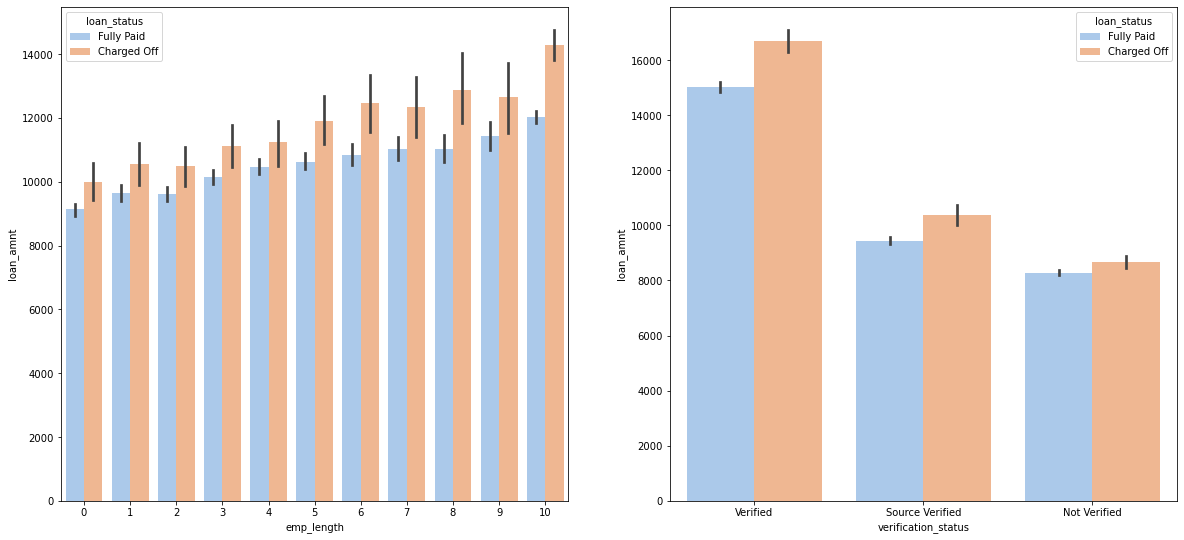

In [81]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =lending_club,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =lending_club,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

Employees with longer working period got a higher loan amount.
Verified applicants have a higher probability of receiving a higher loan amount.

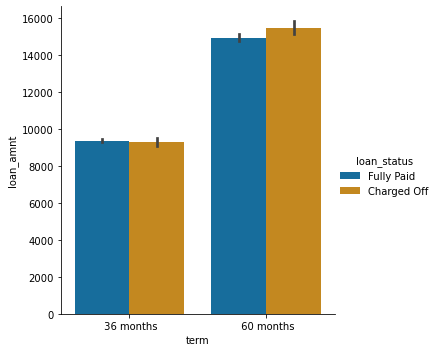

In [82]:
sns.catplot(x = 'term', y = 'loan_amnt', data = lending_club,hue = 'loan_status', kind = 'bar')

There is no significant difference between the applicants applied for loan and defaulted in loan amount.

#### The following are the observations :
- Applicants taking loan for 'home improvement' category and have income of 60000 to 70000
- Applicants who have taken a loan in the range 30000 - 35000 and are charged interest rate of 15% to 17.5%
- When grade is F and loan amount is between 15000 to 18000
- When employment length is greater than 10 years the loan amount is 13000 to 15000
- When the loan is verified, the laon amount is higher than the other verification status.